## Regresión Logística

Victor Alfonso Ulloa Acosta - Grupo 54

In [5]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [194]:
Datos = pd.read_csv('C:/ANALISIS/Rlogisitica/Heart.csv')

In [20]:
## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [23]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

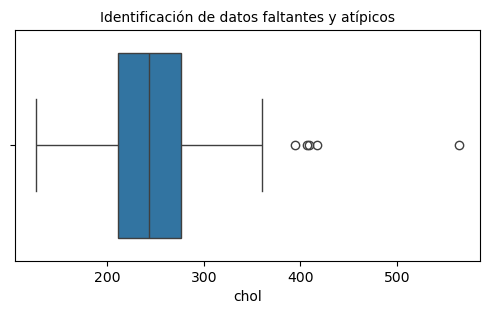

In [62]:
## Consulta de la columna "chol"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de datos faltantes y atípicos', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

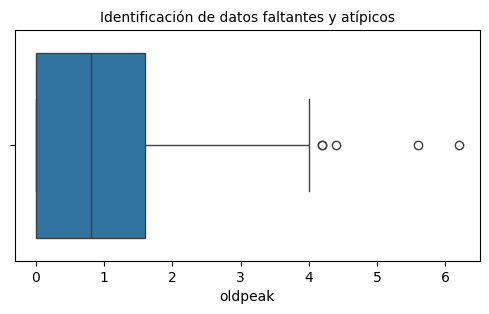

In [45]:
## Consulta de la columna "oldpeak"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de datos faltantes y atípicos', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

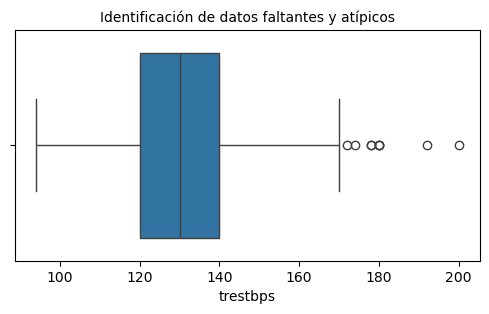

In [53]:
## Consulta de la columna "trestbps"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de datos faltantes y atípicos', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

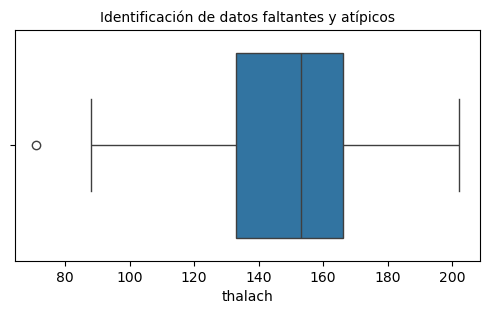

In [56]:
## Consulta de la columna "thalach"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de datos faltantes y atípicos', fontsize = 10)

In [84]:
## 2. Preprocesar los datos, limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
print("Cantidad de registros con cero en la columna -OLDPEAK: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en la columna -CA: ",Datos['ca'].isin([0]).sum())
print("Cantidad de registros con cero en la columna -THAL: ",Datos['thal'].isin([0]).sum())

Cantidad de registros con cero en la columna -OLDPEAK:  96
Cantidad de registros con cero en la columna -CA:  174
Cantidad de registros con cero en la columna -THAL:  164


In [88]:
## Reemplazo de todos los ceros por el valor medio de la columna.
Datos['oldpeak'] = Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['ca'] = Datos['ca'].replace(0,Datos['ca'].mean())
Datos['thal'] = Datos['thal'].replace(0,Datos['thal'].mean())

In [90]:
## Validación para verificar si los ceros fueron reemplazados correctamente.
print("Cantidad de registros con cero en la columna -OLDPEAK: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en la columna -CA: ",Datos['ca'].isin([0]).sum())
print("Cantidad de registros con cero en la columna -THAL: ",Datos['thal'].isin([0]).sum())

Cantidad de registros con cero en la columna -OLDPEAK:  0
Cantidad de registros con cero en la columna -CA:  0
Cantidad de registros con cero en la columna -THAL:  0


Text(0.5, 1.0, 'Identificación de datos Atípicos')

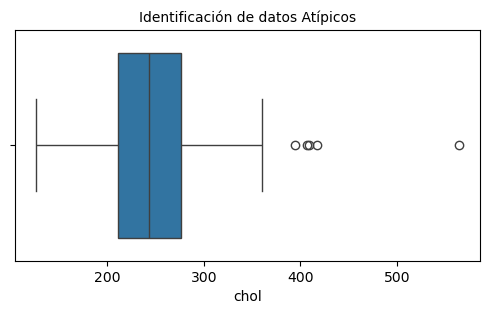

In [124]:
## Identificación de datos atípicos en la columna "chol"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de datos Atípicos', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos atípicos')

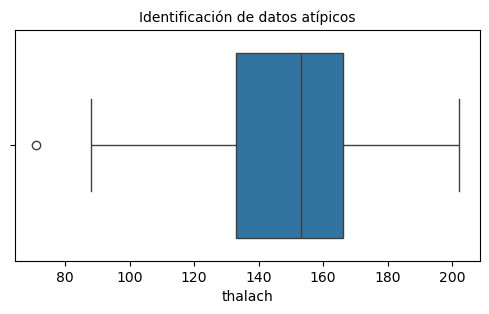

In [116]:
## Identificación de datos atípicos en la columna "thalach"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de datos atípicos', fontsize = 10)

Text(0.5, 1.0, 'Identificación de datos atípicos')

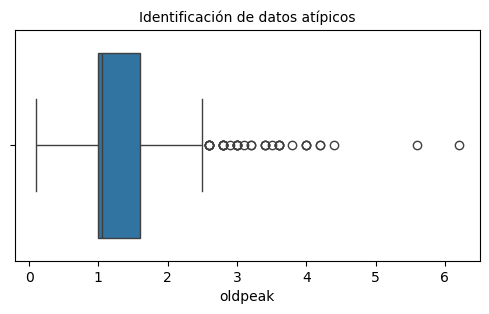

In [114]:
## Identificación de datos atípicos en la columna "oldpeak"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de datos atípicos', fontsize = 10)

In [130]:
## Conteo de datos atípicos para la columna "chol"
Rango_Min=126
Rango_Max=200
Total_Atipicos=((Datos['chol']<Rango_Min)|(Datos['chol']>Rango_Max)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 248


In [136]:
## Conteo de datos atípicos para la columna "thalach"
Rango_Min=60
Rango_Max=100
Total_Atipicos=((Datos['thalach']<Rango_Min)|(Datos['thalach']>Rango_Max)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 289


In [144]:
## Conteo de datos atípicos para la columna "oldpeak"
Rango_Min=0.0
Rango_Max=0.2
Total_Atipicos=((Datos['oldpeak']<Rango_Min)|(Datos['oldpeak']>Rango_Max)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 279


In [148]:
# Filtrar datos atípicos de la columna "chol"
Datos=Datos[((Datos['chol']<Rango_Max)&(Datos['chol']>Rango_Min))]

In [150]:
# Filtrar datos atípicos de la columna "thalach"
Datos=Datos[((Datos['thalach']<Rango_Max)&(Datos['thalach']>Rango_Min))]

In [152]:
# Filtrar datos atípicos de la columna "oldpeak"
Datos=Datos[((Datos['oldpeak']<Rango_Max)&(Datos['oldpeak']>Rango_Min))]

In [154]:
## Verificar si los datos atípicos fueron removidos correctamente de la columna "chol"
Total_Atipicos=((Datos['chol']<Rango_Min)|(Datos['chol']>Rango_Max)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 0


In [156]:
## Verificar si los datos atípicos fueron removidos correctamente de la columna "oldpeak"
Total_Atipicos=((Datos['oldpeak']<Rango_Min)|(Datos['oldpeak']>Rango_Max)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 0


In [158]:
## Verificar si los datos atípicos fueron removidos correctamente de la columna "thalach"
Total_Atipicos=((Datos['thalach']<Rango_Min)|(Datos['thalach']>Rango_Max)).sum()
print("El total de datos atípicos es de {}".format(Total_Atipicos))

El total de datos atípicos es de 0


In [160]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      int64  
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      float64
 12  thal       0 non-null      float64
 13  condition  0 non-null      int64  
dtypes: float64(3), int64(11)
memory usage: 0.0 bytes


In [202]:
## Total de personas con enfermades cardíacas
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [204]:
## Se crean variables X y Y para almacenar la información del entrenamiento
X = Datos.drop('condition',axis=1)
Y = Datos['condition']

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=0)

In [208]:
## Imprime el valor de Train
print (X_train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
238   56    0   3       134   409    0        2      150      1      1.9   
296   35    1   3       126   282    0        2      156      1      0.0   
140   44    1   2       140   235    0        2      180      0      0.0   
106   56    1   2       130   256    1        2      142      1      0.6   
181   63    0   3       108   269    0        0      169      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
67    41    0   1       126   306    0        0      163      0      0.0   
15    52    1   0       118   186    0        2      190      0      0.0   
21    38    1   0       120   231    0        0      182      1      3.8   
248   54    1   3       122   286    0        2      116      1      3.2   
135   46    0   2       142   177    0        2      160      1      1.4   

     slope  ca  thal  
238      1   2     2  
296      0   0     2  
140      0   0    

In [212]:
## Imprime el valor de Test
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
255   52    1   3       128   255    0        0      161      1      0.0   
219   58    0   3       170   225    1        2      146      1      2.8   
7     61    1   0       134   234    0        0      145      0      2.6   
43    54    1   1       108   309    0        0      156      0      0.0   
54    46    1   1       101   197    1        0      156      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
5     64    1   0       170   227    0        2      155      0      0.6   
89    63    0   2       135   252    0        2      172      0      0.0   
267   48    1   3       124   274    0        2      166      0      0.5   
157   70    1   3       145   174    0        0      125      1      2.6   
208   59    1   3       110   239    0        2      142      1      1.2   

     slope  ca  thal  
255      0   1     2  
219      1   2     1  
7        1   2    

In [214]:
## Construcción del modelo de Regresión logísitica
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)
Prediccion = modelo_regresion.predict(X_test)

In [216]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,52,1,3,128,255,0,0,161,1,0.0,0,1,2
219,58,0,3,170,225,1,2,146,1,2.8,1,2,1
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
43,54,1,1,108,309,0,0,156,0,0.0,0,0,2
54,46,1,1,101,197,1,0,156,0,0.0,0,0,2
235,56,1,3,130,283,1,2,103,1,1.6,2,0,2
33,57,0,1,130,236,0,2,174,0,0.0,1,1,0
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
137,44,0,2,108,141,0,0,175,0,0.6,1,0,0
129,49,1,2,118,149,0,2,126,0,0.8,0,3,0


In [218]:
## Muestra la Predicción
print (Prediccion)

[1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1]


In [220]:
## Evaluación del desempeño del modelo "carga de métricas"
print (classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        48
           1       0.90      0.83      0.86        42

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



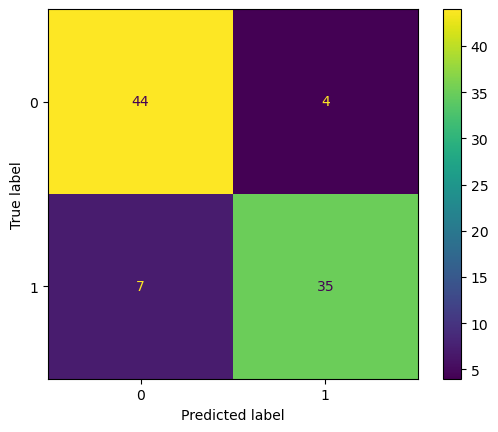

In [222]:
## Gráfica de "Matriz de confusión"
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

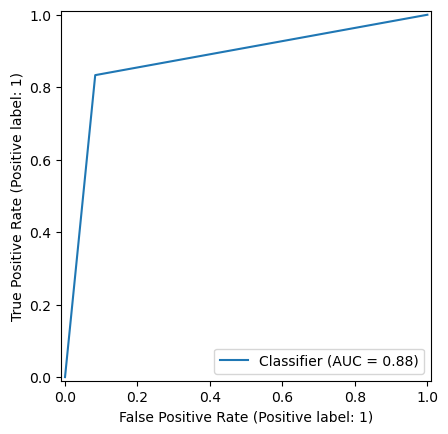

In [224]:
## Gráfica de "Curva de precisión":
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## Interpretación, análisis y documentación de resultados

Los resultados obtenidos han permitido poner en práctica los conocimientos adquiridos sobre modelos predictivos. Se ha explorado el algoritmo de Regresión Logística, utilizando el dataset "Heart.csv" de Kaggle, el cual contiene información sobre pacientes con enfermedades cardíacas.

1. Cargue de las Librerías:

Se importan las librerías necesarias para el análisis y modelado de datos.
pandas: Para manejo y análisis de estructuras de datos (DataFrames).
numpy: Para cálculo numérico y análisis de datos.
seaborn: Para creación de gráficos estadísticos.
matplotlib.pyplot: Para creación de gráficos en dos dimensiones.
sklearn.metrics: Para métricas de evaluación de modelos.
sklearn.model_selection: Para división de datos en conjuntos de entrenamiento y prueba.
sklearn.linear_model: Para el modelo de Regresión Logística.

2. Cargue del Dataset:

Se carga el dataset "Heart.csv" utilizando la función `pd.read_csv()`.

3. Análisis Exploratorio de los Datos:

Se visualiza la información general del dataset utilizando `Datos.head(10)` para mostrar las primeras 10 filas.
Se utiliza `Datos.describe()` para obtener estadísticas descriptivas de las columnas numéricas, incluyendo la media, desviación estándar, valores mínimo y máximo, percentiles, etc.

4. Preprocesamiento de los Datos:

Reemplazo de ceros por el valor medio: Se reemplazan los ceros en las columnas "oldpeak", "ca" y "thal" por el valor medio de la columna respectiva.
Validación del reemplazo: Se verifica que los ceros fueron reemplazados correctamente mediante la suma de los registros con cero en cada columna.

5. Identificación de Datos Atípicos:

Se utilizan gráficos de caja (boxplots) para visualizar la distribución de los datos y detectar posibles valores atípicos en las columnas "chol", "fbs", "thalach" y "oldpeak".
Se define un rango de valores para cada columna y se cuenta la cantidad de datos atípicos.

6. Filtrado de Datos Atípicos:

Se filtran los datos atípicos de las columnas "chol", "thalach" y "oldpeak" según los rangos definidos anteriormente.

7. Verificación de la Eliminación de Datos Atípicos:

Se verifica que los datos atípicos fueron eliminados correctamente mediante la suma de los registros atípicos en cada columna.

8. Revisión del Tipo de Datos y Datos Faltantes:

Se utiliza `Datos.info()` para revisar el tipo de datos de cada columna y la cantidad de datos faltantes.

9. Total de Personas con Enfermedades Cardíacas:

Se cuenta la cantidad de registros con "condition" igual a 1, lo que representa el número de personas con enfermedades cardíacas.

10. Creación de las Variables X y Y:

Se crea la variable `X` que contiene todas las columnas del dataset excepto "condition".
Se crea la variable `Y` que contiene la columna "condition", que será la variable objetivo a predecir.

11. División de los Datos en Train y Test:

Se utiliza la función `train_test_split()` para dividir los datos en conjuntos de entrenamiento (Train) y prueba (Test) con una proporción de 70% - 30%, respectivamente.

12. Construcción del Modelo de Regresión Logística:

Se crea un modelo de Regresión Logística utilizando la función `LogisticRegression()`.
Se entrena el modelo con los datos de entrenamiento utilizando la función `fit()`.
Se realizan predicciones con el modelo utilizando la función `predict()`.

13. Evaluación del Desempeño del Modelo:

Matriz de Confusión: La gráfica muestra que el modelo predice correctamente 44 casos de personas sin enfermedades cardíacas (verdaderos negativos) y 35 casos de personas con enfermedades cardíacas (verdaderos positivos).
4 falsos positivos: El modelo predice que 4 personas tienen enfermedades cardíacas, cuando en realidad no las tienen.
7 falsos negativos: El modelo predice que 7 personas no tienen enfermedades cardíacas, cuando en realidad sí las tienen.
Métricas: Se utiliza la función `classification_report()` para obtener métricas de desempeño del modelo, como precisión, recall, F1-score y exactitud.
Curva ROC: La gráfica de la curva ROC muestra que el modelo tiene un área bajo la curva (AUC) de 0.88. Esto indica que el modelo tiene una buena capacidad para discriminar entre las clases. 

14. Interpretación de los Resultados:

El modelo de Regresión Logística ha logrado una buena precisión en la predicción de la presencia de enfermedad cardíaca. 
Se observa un buen equilibrio entre la precisión y el recall, lo que indica que el modelo puede identificar correctamente casos positivos y negativos.
La curva ROC muestra una buena capacidad del modelo para discriminar entre las clases.